In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/pro_v/OneDrive/Desktop/DSC 550 (Data Mining)/Week 4/DailyComments.csv")

In [3]:
df.head(10)

,Day of Week,comments
0,Monday,"Hello, how are you?"
1,Tuesday,Today is a good day!
2,Wednesday,It's my birthday so it's a really special day!
3,Thursday,Today is neither a good day or a bad day!
4,Friday,I'm having a bad day.
5,Saturday,There' s nothing special happening today.
6,Sunday,Today is a SUPER good day!


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day of Week  7 non-null      object
 1   comments     7 non-null      object
dtypes: object(2)
memory usage: 240.0+ bytes


In [5]:
df.columns

Index(['Day of Week', 'comments'], dtype='object')

In [6]:
df['Lower']=df['comments'].apply(lambda x: x.lower())

In [7]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import pos_tag, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
df['No_punct'] = df['Lower'].apply(lambda x: re.sub(r'[^\w\s]','',x))

In [9]:
df.head(10)

,Day of Week,comments,Lower,No_punct
0,Monday,"Hello, how are you?","hello, how are you?",hello how are you
1,Tuesday,Today is a good day!,today is a good day!,today is a good day
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!,its my birthday so its a really special day
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day or a bad day!,today is neither a good day or a bad day
4,Friday,I'm having a bad day.,i'm having a bad day.,im having a bad day
5,Saturday,There' s nothing special happening today.,there' s nothing special happening today.,there s nothing special happening today
6,Sunday,Today is a SUPER good day!,today is a super good day!,today is a super good day


In [10]:
df['Length']=df['No_punct'].str.len()

In [11]:
df.head(10)

,Day of Week,comments,Lower,No_punct,Length
0,Monday,"Hello, how are you?","hello, how are you?",hello how are you,17
1,Tuesday,Today is a good day!,today is a good day!,today is a good day,19
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!,its my birthday so its a really special day,43
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day or a bad day!,today is neither a good day or a bad day,40
4,Friday,I'm having a bad day.,i'm having a bad day.,im having a bad day,19
5,Saturday,There' s nothing special happening today.,there' s nothing special happening today.,there s nothing special happening today,39
6,Sunday,Today is a SUPER good day!,today is a super good day!,today is a super good day,25


Text(0.5, 0, 'Day of Week')

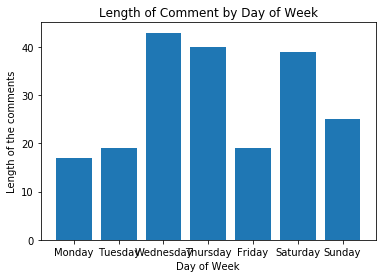

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(df['Day of Week'],df.Length)
ax.set_title('Length of Comment by Day of Week')
ax.set_ylabel('Length of the comments')
ax.set_xlabel('Day of Week')

In [13]:
from textblob import TextBlob

In [14]:
df['Textblob sentiment score'] = df['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head(10)

,Day of Week,comments,Lower,No_punct,Length,Textblob sentiment score
0,Monday,"Hello, how are you?","hello, how are you?",hello how are you,17,0.000000
1,Tuesday,Today is a good day!,today is a good day!,today is a good day,19,0.875000
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!,its my birthday so its a really special day,43,0.446429
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day or a bad day!,today is neither a good day or a bad day,40,-0.087500
4,Friday,I'm having a bad day.,i'm having a bad day.,im having a bad day,19,-0.700000
5,Saturday,There' s nothing special happening today.,there' s nothing special happening today.,there s nothing special happening today,39,0.357143
6,Sunday,Today is a SUPER good day!,today is a super good day!,today is a super good day,25,0.604167


Above is the sentiment analysis of the text using textblob. The scores are for polarity, where from 0 to 1 signifies a positive comment and 0 to -1 signifies a negative comment.

In [15]:
df['Textblob sentiment score for Lower'] = df['Lower'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head(10)

,Day of Week,comments,Lower,No_punct,Length,Textblob sentiment score,Textblob sentiment score for Lower
0,Monday,"Hello, how are you?","hello, how are you?",hello how are you,17,0.000000,0.000000
1,Tuesday,Today is a good day!,today is a good day!,today is a good day,19,0.875000,0.875000
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!,its my birthday so its a really special day,43,0.446429,0.446429
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day or a bad day!,today is neither a good day or a bad day,40,-0.087500,-0.087500
4,Friday,I'm having a bad day.,i'm having a bad day.,im having a bad day,19,-0.700000,-0.700000
5,Saturday,There' s nothing special happening today.,there' s nothing special happening today.,there s nothing special happening today,39,0.357143,0.357143
6,Sunday,Today is a SUPER good day!,today is a super good day!,today is a super good day,25,0.604167,0.604167


In [16]:
df['Textblob sentiment score for No_punct'] = df['No_punct'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head(10)

,Day of Week,comments,Lower,No_punct,Length,Textblob sentiment score,Textblob sentiment score for Lower,Textblob sentiment score for No_punct
0,Monday,"Hello, how are you?","hello, how are you?",hello how are you,17,0.000000,0.000000,0.000000e+00
1,Tuesday,Today is a good day!,today is a good day!,today is a good day,19,0.875000,0.875000,7.000000e-01
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!,its my birthday so its a really special day,43,0.446429,0.446429,3.571429e-01
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day or a bad day!,today is neither a good day or a bad day,40,-0.087500,-0.087500,5.551115e-17
4,Friday,I'm having a bad day.,i'm having a bad day.,im having a bad day,19,-0.700000,-0.700000,-7.000000e-01
5,Saturday,There' s nothing special happening today.,there' s nothing special happening today.,there s nothing special happening today,39,0.357143,0.357143,3.571429e-01
6,Sunday,Today is a SUPER good day!,today is a super good day!,today is a super good day,25,0.604167,0.604167,5.166667e-01


Above is the comparision of textblob polarity result with the comments in the original version, conversion to lower case and removal of punctuations.

In [17]:
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')
from nltk.corpus import sentiwordnet as swn

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\pro_v\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pro_v\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pro_v\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [20]:
vader = SentimentIntensityAnalyzer()

Adding Vader scores to the table for the comments, without conversion to lower case and without removal of any punctuations

In [21]:
df['Vader Scores Positive'] = df['comments'].apply(lambda x: vader.polarity_scores(x)['pos'])
df['Vader Scores Negative'] = df['comments'].apply(lambda x: vader.polarity_scores(x)['neg'])
df['Vader Scores Neutral'] = df['comments'].apply(lambda x: vader.polarity_scores(x)['neu'])
df['Vader Scores Compound'] = df['comments'].apply(lambda x: vader.polarity_scores(x)['compound'])
df.head(10)

,Day of Week,comments,Lower,No_punct,Length,Textblob sentiment score,Textblob sentiment score for Lower,Textblob sentiment score for No_punct,Vader Scores Positive,Vader Scores Negative,Vader Scores Neutral,Vader Scores Compound
0,Monday,"Hello, how are you?","hello, how are you?",hello how are you,17,0.000000,0.000000,0.000000e+00,0.000,0.000,1.000,0.0000
1,Tuesday,Today is a good day!,today is a good day!,today is a good day,19,0.875000,0.875000,7.000000e-01,0.516,0.000,0.484,0.4926
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!,its my birthday so its a really special day,43,0.446429,0.446429,3.571429e-01,0.336,0.000,0.664,0.5497
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day or a bad day!,today is neither a good day or a bad day,40,-0.087500,-0.087500,5.551115e-17,0.000,0.508,0.492,-0.7350
4,Friday,I'm having a bad day.,i'm having a bad day.,im having a bad day,19,-0.700000,-0.700000,-7.000000e-01,0.000,0.538,0.462,-0.5423
5,Saturday,There' s nothing special happening today.,there' s nothing special happening today.,there s nothing special happening today,39,0.357143,0.357143,3.571429e-01,0.000,0.361,0.639,-0.3089
6,Sunday,Today is a SUPER good day!,today is a super good day!,today is a super good day,25,0.604167,0.604167,5.166667e-01,0.723,0.000,0.277,0.8327


Adding Vader Scores to the table after removal of punctuations and conversion to lower case.

In [22]:
df['Vader Scores Positive without punctuations'] = df['No_punct'].apply(lambda x: vader.polarity_scores(x)['pos'])
df['Vader Scores Negative without punctuations'] = df['No_punct'].apply(lambda x: vader.polarity_scores(x)['neg'])
df['Vader Scores Neutral without punctuations'] = df['No_punct'].apply(lambda x: vader.polarity_scores(x)['neu'])
df['Vader Scores Compound without punctuations'] = df['No_punct'].apply(lambda x: vader.polarity_scores(x)['compound'])
df.head(10)

,Day of Week,comments,Lower,No_punct,Length,Textblob sentiment score,Textblob sentiment score for Lower,Textblob sentiment score for No_punct,Vader Scores Positive,Vader Scores Negative,Vader Scores Neutral,Vader Scores Compound,Vader Scores Positive without punctuations,Vader Scores Negative without punctuations,Vader Scores Neutral without punctuations,Vader Scores Compound without punctuations
0,Monday,"Hello, how are you?","hello, how are you?",hello how are you,17,0.000000,0.000000,0.000000e+00,0.000,0.000,1.000,0.0000,0.000,0.000,1.000,0.0000
1,Tuesday,Today is a good day!,today is a good day!,today is a good day,19,0.875000,0.875000,7.000000e-01,0.516,0.000,0.484,0.4926,0.492,0.000,0.508,0.4404
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!,its my birthday so its a really special day,43,0.446429,0.446429,3.571429e-01,0.336,0.000,0.664,0.5497,0.318,0.000,0.682,0.5034
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day or a bad day!,today is neither a good day or a bad day,40,-0.087500,-0.087500,5.551115e-17,0.000,0.508,0.492,-0.7350,0.000,0.496,0.504,-0.7101
4,Friday,I'm having a bad day.,i'm having a bad day.,im having a bad day,19,-0.700000,-0.700000,-7.000000e-01,0.000,0.538,0.462,-0.5423,0.000,0.538,0.462,-0.5423
5,Saturday,There' s nothing special happening today.,there' s nothing special happening today.,there s nothing special happening today,39,0.357143,0.357143,3.571429e-01,0.000,0.361,0.639,-0.3089,0.000,0.361,0.639,-0.3089
6,Sunday,Today is a SUPER good day!,today is a super good day!,today is a super good day,25,0.604167,0.604167,5.166667e-01,0.723,0.000,0.277,0.8327,0.694,0.000,0.306,0.7783


Categorizing textblob sentiment scores into either Positive or Negative sentiment. If the textblob score was greater than 0 it was classified into a Positive (+ve) comment, otherwise it was categorized as a negative comment. This was done for both the Lower Case and no punctuation comments. This was done as the Assignment specified categorizing to either a positive or negative comment.  

In [23]:
df['Categorize lowercase comment'] = df["Textblob sentiment score for Lower"].apply(lambda x: 'Positive' if x >=0 else 'Negative')
df['Categorize No Punctuations comment'] = df["Textblob sentiment score for No_punct"].apply(lambda x: 'Positive' if x >=0 else 'Negative')
df.head(10)

,Day of Week,comments,Lower,No_punct,Length,Textblob sentiment score,Textblob sentiment score for Lower,Textblob sentiment score for No_punct,Vader Scores Positive,Vader Scores Negative,Vader Scores Neutral,Vader Scores Compound,Vader Scores Positive without punctuations,Vader Scores Negative without punctuations,Vader Scores Neutral without punctuations,Vader Scores Compound without punctuations,Categorize lowercase comment,Categorize No Punctuations comment
0,Monday,"Hello, how are you?","hello, how are you?",hello how are you,17,0.000000,0.000000,0.000000e+00,0.000,0.000,1.000,0.0000,0.000,0.000,1.000,0.0000,Positive,Positive
1,Tuesday,Today is a good day!,today is a good day!,today is a good day,19,0.875000,0.875000,7.000000e-01,0.516,0.000,0.484,0.4926,0.492,0.000,0.508,0.4404,Positive,Positive
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!,its my birthday so its a really special day,43,0.446429,0.446429,3.571429e-01,0.336,0.000,0.664,0.5497,0.318,0.000,0.682,0.5034,Positive,Positive
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day or a bad day!,today is neither a good day or a bad day,40,-0.087500,-0.087500,5.551115e-17,0.000,0.508,0.492,-0.7350,0.000,0.496,0.504,-0.7101,Negative,Positive
4,Friday,I'm having a bad day.,i'm having a bad day.,im having a bad day,19,-0.700000,-0.700000,-7.000000e-01,0.000,0.538,0.462,-0.5423,0.000,0.538,0.462,-0.5423,Negative,Negative
5,Saturday,There' s nothing special happening today.,there' s nothing special happening today.,there s nothing special happening today,39,0.357143,0.357143,3.571429e-01,0.000,0.361,0.639,-0.3089,0.000,0.361,0.639,-0.3089,Positive,Positive
6,Sunday,Today is a SUPER good day!,today is a super good day!,today is a super good day,25,0.604167,0.604167,5.166667e-01,0.723,0.000,0.277,0.8327,0.694,0.000,0.306,0.7783,Positive,Positive


In [24]:
df['Categorize lowercase comment'].value_counts()/len(df)*100

Positive    71.428571
Negative    28.571429
Name: Categorize lowercase comment, dtype: float64

In [25]:
df['Categorize No Punctuations comment'].value_counts()/len(df)*100

Positive    85.714286
Negative    14.285714
Name: Categorize No Punctuations comment, dtype: float64

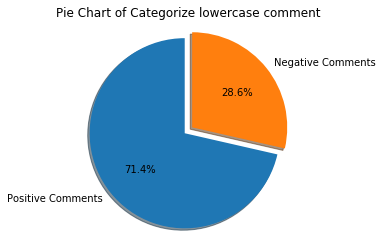

In [26]:
sizes = [71.428571, 28.571429]
labels = 'Positive Comments', 'Negative Comments'
explode = (0.1, 0)
fig2, ax2 = plt.subplots()
ax2.pie(sizes, explode,labels=labels, autopct='%1.1f%%',shadow = True, startangle = 90)
ax2.axis('equal')
ax2.set_title('Pie Chart of Categorize lowercase comment')
plt.show()

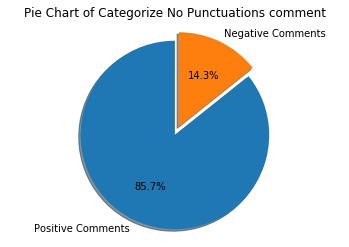

In [27]:
sizes = [85.714286, 14.285714]
labels = 'Positive Comments', 'Negative Comments'
explode = (0.1, 0)
fig3, ax3 = plt.subplots()
ax3.pie(sizes, explode,labels=labels, autopct='%1.1f%%',shadow = True, startangle = 90)
ax3.axis('equal')
ax3.set_title('Pie Chart of Categorize No Punctuations comment')
plt.show()

Subjectivity of the comments

In [28]:
df['Textblob Subjectivity score'] = df['comments'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head(10)

,Day of Week,comments,Lower,No_punct,Length,Textblob sentiment score,Textblob sentiment score for Lower,Textblob sentiment score for No_punct,Vader Scores Positive,Vader Scores Negative,Vader Scores Neutral,Vader Scores Compound,Vader Scores Positive without punctuations,Vader Scores Negative without punctuations,Vader Scores Neutral without punctuations,Vader Scores Compound without punctuations,Categorize lowercase comment,Categorize No Punctuations comment,Textblob Subjectivity score
0,Monday,"Hello, how are you?","hello, how are you?",hello how are you,17,0.000000,0.000000,0.000000e+00,0.000,0.000,1.000,0.0000,0.000,0.000,1.000,0.0000,Positive,Positive,0.000000
1,Tuesday,Today is a good day!,today is a good day!,today is a good day,19,0.875000,0.875000,7.000000e-01,0.516,0.000,0.484,0.4926,0.492,0.000,0.508,0.4404,Positive,Positive,0.600000
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!,its my birthday so its a really special day,43,0.446429,0.446429,3.571429e-01,0.336,0.000,0.664,0.5497,0.318,0.000,0.682,0.5034,Positive,Positive,0.571429
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day or a bad day!,today is neither a good day or a bad day,40,-0.087500,-0.087500,5.551115e-17,0.000,0.508,0.492,-0.7350,0.000,0.496,0.504,-0.7101,Negative,Positive,0.633333
4,Friday,I'm having a bad day.,i'm having a bad day.,im having a bad day,19,-0.700000,-0.700000,-7.000000e-01,0.000,0.538,0.462,-0.5423,0.000,0.538,0.462,-0.5423,Negative,Negative,0.666667
5,Saturday,There' s nothing special happening today.,there' s nothing special happening today.,there s nothing special happening today,39,0.357143,0.357143,3.571429e-01,0.000,0.361,0.639,-0.3089,0.000,0.361,0.639,-0.3089,Positive,Positive,0.571429
6,Sunday,Today is a SUPER good day!,today is a super good day!,today is a super good day,25,0.604167,0.604167,5.166667e-01,0.723,0.000,0.277,0.8327,0.694,0.000,0.306,0.7783,Positive,Positive,0.633333


In [29]:
df['Textblob Subjectivity score for No_punct'] = df['No_punct'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head(10)

,Day of Week,comments,Lower,No_punct,Length,Textblob sentiment score,Textblob sentiment score for Lower,Textblob sentiment score for No_punct,Vader Scores Positive,Vader Scores Negative,Vader Scores Neutral,Vader Scores Compound,Vader Scores Positive without punctuations,Vader Scores Negative without punctuations,Vader Scores Neutral without punctuations,Vader Scores Compound without punctuations,Categorize lowercase comment,Categorize No Punctuations comment,Textblob Subjectivity score,Textblob Subjectivity score for No_punct
0,Monday,"Hello, how are you?","hello, how are you?",hello how are you,17,0.000000,0.000000,0.000000e+00,0.000,0.000,1.000,0.0000,0.000,0.000,1.000,0.0000,Positive,Positive,0.000000,0.000000
1,Tuesday,Today is a good day!,today is a good day!,today is a good day,19,0.875000,0.875000,7.000000e-01,0.516,0.000,0.484,0.4926,0.492,0.000,0.508,0.4404,Positive,Positive,0.600000,0.600000
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!,its my birthday so its a really special day,43,0.446429,0.446429,3.571429e-01,0.336,0.000,0.664,0.5497,0.318,0.000,0.682,0.5034,Positive,Positive,0.571429,0.571429
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day or a bad day!,today is neither a good day or a bad day,40,-0.087500,-0.087500,5.551115e-17,0.000,0.508,0.492,-0.7350,0.000,0.496,0.504,-0.7101,Negative,Positive,0.633333,0.633333
4,Friday,I'm having a bad day.,i'm having a bad day.,im having a bad day,19,-0.700000,-0.700000,-7.000000e-01,0.000,0.538,0.462,-0.5423,0.000,0.538,0.462,-0.5423,Negative,Negative,0.666667,0.666667
5,Saturday,There' s nothing special happening today.,there' s nothing special happening today.,there s nothing special happening today,39,0.357143,0.357143,3.571429e-01,0.000,0.361,0.639,-0.3089,0.000,0.361,0.639,-0.3089,Positive,Positive,0.571429,0.571429
6,Sunday,Today is a SUPER good day!,today is a super good day!,today is a super good day,25,0.604167,0.604167,5.166667e-01,0.723,0.000,0.277,0.8327,0.694,0.000,0.306,0.7783,Positive,Positive,0.633333,0.633333


The above table shows that all the comments are subjective except for the first which is highly objective.

In [30]:
df['Categorize subjectivity'] = df["Textblob Subjectivity score for No_punct"].apply(lambda x: 'Subjective' if x >=0.5 else 'Objective')
df.head(10)

,Day of Week,comments,Lower,No_punct,Length,Textblob sentiment score,Textblob sentiment score for Lower,Textblob sentiment score for No_punct,Vader Scores Positive,Vader Scores Negative,...,Vader Scores Compound,Vader Scores Positive without punctuations,Vader Scores Negative without punctuations,Vader Scores Neutral without punctuations,Vader Scores Compound without punctuations,Categorize lowercase comment,Categorize No Punctuations comment,Textblob Subjectivity score,Textblob Subjectivity score for No_punct,Categorize subjectivity
0,Monday,"Hello, how are you?","hello, how are you?",hello how are you,17,0.000000,0.000000,0.000000e+00,0.000,0.000,...,0.0000,0.000,0.000,1.000,0.0000,Positive,Positive,0.000000,0.000000,Objective
1,Tuesday,Today is a good day!,today is a good day!,today is a good day,19,0.875000,0.875000,7.000000e-01,0.516,0.000,...,0.4926,0.492,0.000,0.508,0.4404,Positive,Positive,0.600000,0.600000,Subjective
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!,its my birthday so its a really special day,43,0.446429,0.446429,3.571429e-01,0.336,0.000,...,0.5497,0.318,0.000,0.682,0.5034,Positive,Positive,0.571429,0.571429,Subjective
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day or a bad day!,today is neither a good day or a bad day,40,-0.087500,-0.087500,5.551115e-17,0.000,0.508,...,-0.7350,0.000,0.496,0.504,-0.7101,Negative,Positive,0.633333,0.633333,Subjective
4,Friday,I'm having a bad day.,i'm having a bad day.,im having a bad day,19,-0.700000,-0.700000,-7.000000e-01,0.000,0.538,...,-0.5423,0.000,0.538,0.462,-0.5423,Negative,Negative,0.666667,0.666667,Subjective
5,Saturday,There' s nothing special happening today.,there' s nothing special happening today.,there s nothing special happening today,39,0.357143,0.357143,3.571429e-01,0.000,0.361,...,-0.3089,0.000,0.361,0.639,-0.3089,Positive,Positive,0.571429,0.571429,Subjective
6,Sunday,Today is a SUPER good day!,today is a super good day!,today is a super good day,25,0.604167,0.604167,5.166667e-01,0.723,0.000,...,0.8327,0.694,0.000,0.306,0.7783,Positive,Positive,0.633333,0.633333,Subjective
